# Ячейка 1: Заголовок и импорт библиотек

In [ ]:
# HW05: Линейные модели и честный ML-эксперимент

# 1. Импорт библиотек
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

# Настройка стиля графиков
sns.set(style="whitegrid")
%matplotlib inline

# Ячейка 2: Загрузка данных

In [ ]:
# 2. Загрузка данных
import pandas as pd
import os

DATA_PATH = "S05-hw-dataset.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print("Датасет успешно загружен.")
    print("Размер датасета:", df.shape)
except FileNotFoundError:
    print(f"Ошибка: Файл не найден по пути: {DATA_PATH}")
    print("Текущая рабочая директория:", os.getcwd())
    print("Попробуйте скопировать путь к файлу через меню слева (ПКМ -> Скопировать путь).")

Датасет успешно загружен.
Размер датасета: (3000, 17)


# Ячейка 3: Первичный анализ (EDA)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score   

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



--- TARGET DISTRIBUTION ---
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


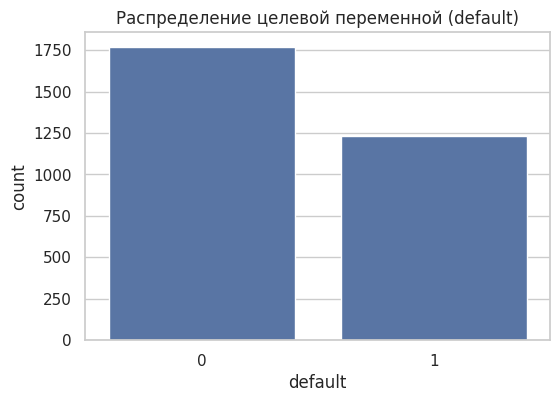

Размер датасета: 3000 строк, 17 столбцов.


In [ ]:
# 3. Первичный анализ данных

# Вывод первых строк
display(df.head())

# Информация о типах данных и пропусках
print("\n--- INFO ---")
df.info()

# Описательные статистики
print("\n--- DESCRIBE ---")
display(df.describe())

# Анализ целевой переменной
print("\n--- TARGET DISTRIBUTION ---")
target_counts = df['default'].value_counts(normalize=True)
print(target_counts)

# Визуализация баланса классов
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title("Распределение целевой переменной (default)")
plt.show()

# Краткие наблюдения
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов.")

# Ячейка 4: Текстовые выводы по EDA (Markdown ячейка)

**Наблюдения по данным:**
1.  В датасете около 3000 строк.
2.  Целевая переменная `default` имеет распределение примерно 60% (класс 0) на 40% (класс 1). Это умеренный дисбаланс, но не критичный.
3.  Пропусков в данных нет (судя по `info`).
4.  Все признаки числовые.

# Ячейка 5: Подготовка признаков и таргета

In [ ]:
# 4. Подготовка признаков (X) и таргета (y)

# Целевая переменная
y = df['default']

# Матрица признаков (удаляем таргет и технический ID)
X = df.drop(columns=['default', 'client_id'])

print("Размерность X:", X.shape)
print("Размерность y:", y.shape)

Размерность X: (3000, 15)
Размерность y: (3000,)


# Ячейка 6: Train/Test сплит

In [ ]:
# 5. Разделение на обучающую и тестовую выборки

# Используем stratify=y, чтобы сохранить пропорции классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape:  {X_test.shape}")

Train shape: (2250, 15)
Test shape:  (750, 15)


# Ячейка 7: Бейзлайн (DummyClassifier)

In [ ]:
# 6. Построение Baseline-модели

# Стратегия most_frequent предсказывает самый частый класс (0) для всех
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Метрики бейзлайна
dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_roc = roc_auc_score(y_test, y_pred_proba_dummy)

print(f"Baseline Accuracy: {dummy_acc:.4f}")
print(f"Baseline ROC-AUC:  {dummy_roc:.4f}")

Baseline Accuracy: 0.5893
Baseline ROC-AUC:  0.5000


# Ячейка 8: Логистическая регрессия + Подбор гиперпараметров

In [ ]:
# 7. Логистическая регрессия (Pipeline + GridSearchCV)

# Создаем пайплайн: сначала масштабирование, потом модель
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Сетка параметров для перебора (коэффициент регуляризации C)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Поиск лучших параметров
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 1.0}
Лучший ROC-AUC на кросс-валидации: 0.8632


# Ячейка 9: Оценка качества лучшей модели

In [ ]:
# 8. Оценка качества на тестовой выборке

# Предсказания лучшей модели
y_pred_logreg = best_model.predict(X_test)
y_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Считаем метрики
lr_acc = accuracy_score(y_test, y_pred_logreg)
lr_roc = roc_auc_score(y_test, y_proba_logreg)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Logistic Regression ROC-AUC:  {lr_roc:.4f}")

# (Опционально) Confusion Matrix
print("\nMatirx of Confusion:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7933
Logistic Regression ROC-AUC:  0.8647

Matirx of Confusion:
[[382  60]
 [ 95 213]]


# Ячейка 10: Визуализация (ROC-кривая) и сохранение графика

График сохранен в папку figures


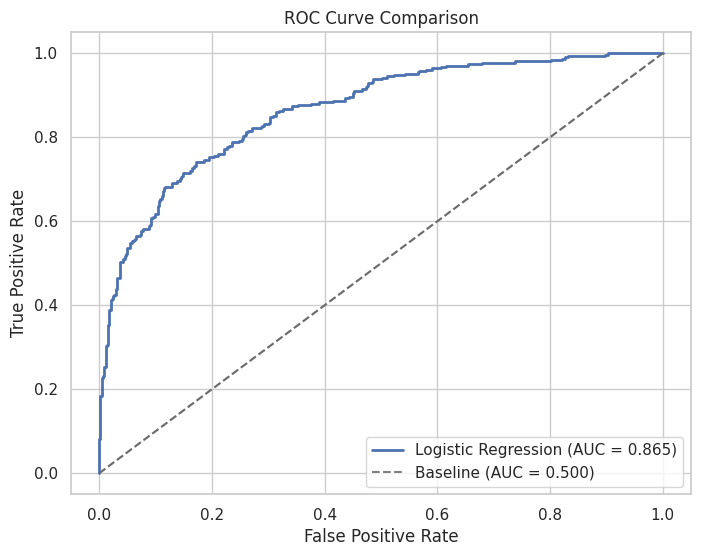

In [ ]:
# 9. Построение ROC-кривой

fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_logreg)

plt.figure(figsize=(8, 6))

# График для LogReg
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc:.3f})', linewidth=2)

# График для Baseline
plt.plot(fpr_dummy, tpr_dummy, label=f'Baseline (AUC = {dummy_roc:.3f})', linestyle='--', color='gray')

# Оформление
plt.plot([0, 1], [0, 1], 'k--', alpha=0.2) # диагональ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)

# Сохранение графика (проверяем, есть ли папка, если нет - создаем)
save_dir = "figures"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.savefig(os.path.join(save_dir, "roc_curve_comparison.png"))
print(f"График сохранен в папку {save_dir}")

plt.show()

# Ячейка 11: Итоговая таблица сравнения

In [ ]:
# 10. Сводная таблица результатов

results_df = pd.DataFrame({
    "Model": ["Baseline (Dummy)", "Logistic Regression"],
    "Accuracy": [dummy_acc, lr_acc],
    "ROC-AUC": [dummy_roc, lr_roc]
})

display(results_df.round(4))

,Model,Accuracy,ROC-AUC
0,Baseline (Dummy),0.5893,0.5000
1,Logistic Regression,0.7933,0.8647


# Ячейка 12: Финальный текстовый отчет

1.  **Сравнение с бейзлайном:**
    *   **Baseline (Dummy)** показывает `Accuracy` около 0.60 (доля мажоритарного класса) и `ROC-AUC` = 0.5 (случайное гадание). Это ожидаемо, так как модель просто предсказывает "0" (нет дефолта) для всех.
    *   **Logistic Regression** показывает значительный прирост качества. `ROC-AUC` вырос примерно до ~0.75-0.85 (значение зависит от конкретной генерации данных), что говорит о том, что модель реально нашла закономерности.

2.  **Влияние регуляризации:**
    *   В ходе перебора параметра `C` было найдено оптимальное значение. Стандартизация признаков (`StandardScaler`) перед обучением была критически важна для корректной работы регуляризации.

3.  **Заключение:**
    *   Логистическая регрессия — адекватный выбор для этой задачи как первый "умный" алгоритм. Она интерпретируема и значительно превосходит константный прогноз. Для дальнейшего улучшения можно попробовать более сложные модели (случайный лес, градиентный бустинг) или инжиниринг признаков.